In [1152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns




In [1153]:
df = pd.read_csv('mymoviedb.csv')
# newdf = df.to_string()


In [1154]:
print(df.tail())

df.info()


     Release_Date                                 Title  \
9832   10/15/1973                              Badlands   
9833    10/1/2020                      Violent Delights   
9834     5/6/2016                          The Offering   
9835    3/31/2021  The United States vs. Billie Holiday   
9836    9/23/1984                               Threads   

                                               Overview  Popularity  \
9832  A dramatization of the Starkweather-Fugate kil...      13.357   
9833  A female vampire falls in love with a man she ...      13.356   
9834  When young and successful reporter Jamie finds...      13.355   
9835  Billie Holiday spent much of her career being ...      13.354   
9836  Documentary style account of a nuclear holocau...      13.354   

     Vote_Count Vote_Average Original_Language                        Genre  \
9832        896          7.6                en                 Drama, Crime   
9833          8          3.5                es              

In [1155]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [1156]:
df.duplicated().sum()

np.int64(0)

In [1157]:
print(np.int64(0))


0


In [1158]:
df.dropna(inplace=True)

In [1159]:
df[ 'Vote_Count']= pd.to_numeric(df['Vote_Count'], errors='coerce')
df['Vote_Average']= pd.to_numeric(df['Vote_Average'], errors='coerce')

In [1160]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000
mean,40.323951,1392.943721,6.439467
std,108.879332,2611.303856,1.129797
min,13.354000,0.000000,0.000000
25%,16.128250,146.000000,5.900000
50%,21.195000,444.000000,6.500000
75%,35.179250,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [1161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   object 
 1   Title              9826 non-null   object 
 2   Overview           9826 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 767.7+ KB


In [1162]:
df.count()

Release_Date         9826
Title                9826
Overview             9826
Popularity           9826
Vote_Count           9826
Vote_Average         9826
Original_Language    9826
Genre                9826
Poster_Url           9826
dtype: int64

In [1163]:
df.shape[0]


9826

# Data preprocessing

1- Data consisting of 9826 rows.   
2- No NaN and duplicate values.    
3- Overview, Poster Url, original_language are not useful so we'll drop them.      
4- Vote_average better be categorized for proper analysing.   
5- Genre column has some commma separated values and white spaces that needs to ve handled and casted into category exploration Summary.   

In [1164]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors='coerce')
# df['Release_Date'].head()
print(df['Release_Date'].dtypes)



datetime64[ns]


In [1165]:
df["Release_Date"] = df["Release_Date"].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [1166]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [1167]:
df.drop(['Overview','Poster_Url', 'Original_Language'], axis=1, inplace=True)



#### *NOTE:* **Categorizing movies by Rating**    
Replacing the vote_average from a numeric value to providing a rating like "Popular", "Average", "Below Average", "Flop"

In [1168]:
conditions =[
    df['Vote_Average'] >= 8.0,
    (df['Vote_Average'] >= 6.0) & (df['Vote_Average'] < 8.0),
    (df['Vote_Average'] >= 4.0) & (df['Vote_Average'] < 6.0),
    (df['Vote_Average'] < 4.0) & (df['Vote_Average'] >= 0.0)
]

choices = ['Popular', 'Good', 'Average', 'Poor']

df['Rating'] = np.select(conditions, choices, default='Unknown')
df['Rating'].value_counts()

Rating
Good       6823
Average    2388
Popular     436
Poor        179
Name: count, dtype: int64

In [1169]:
print(df[['Vote_Average', 'Rating']].head())


   Vote_Average   Rating
0           8.3  Popular
1           8.1  Popular
2           6.3     Good
3           7.7     Good
4           7.0     Good


In [1170]:
df.drop(['Vote_Average'], axis=1, inplace=True)

In [1171]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9826 non-null   int32  
 1   Title         9826 non-null   object 
 2   Popularity    9826 non-null   float64
 3   Vote_Count    9826 non-null   int64  
 4   Genre         9826 non-null   object 
 5   Rating        9826 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 499.0+ KB


In [1172]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Genre,Rating
0,2021,Spider-Man: No Way Home,5083.954,8940,"Action, Adventure, Science Fiction",Popular
1,2022,The Batman,3827.658,1151,"Crime, Mystery, Thriller",Popular
2,2022,No Exit,2618.087,122,Thriller,Good
3,2021,Encanto,2402.201,5076,"Animation, Comedy, Family, Fantasy",Good
4,2021,The King's Man,1895.511,1793,"Action, Adventure, Thriller, War",Good


In [1173]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Genre           0
Rating          0
dtype: int64

#### *NOTE:*  **We would split the genres into list and explode our dataframe to have one genre per row for each movie**


In [1174]:
df['Genre'] = df['Genre'].str.split(', ')
df= df.explode('Genre').reset_index(drop=True)
df['Genre'].count()
df['Genre'].value_counts()

Genre
Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1438
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: count, dtype: int64

In [1175]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Genre,Rating
0,2021,Spider-Man: No Way Home,5083.954,8940,Action,Popular
1,2021,Spider-Man: No Way Home,5083.954,8940,Adventure,Popular
2,2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,Popular
3,2022,The Batman,3827.658,1151,Crime,Popular
4,2022,The Batman,3827.658,1151,Mystery,Popular


#### *Casting the Genre column to a categorical type* ####

In [1176]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [1177]:
df.nunique()

Release_Date     102
Title           9512
Popularity      8159
Vote_Count      3266
Genre             19
Rating             4
dtype: int64

## **Data Visualization**

In [1178]:
sns.set_theme(style="darkgrid")

 ### **1- Most frequent Genre**

In [1179]:
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

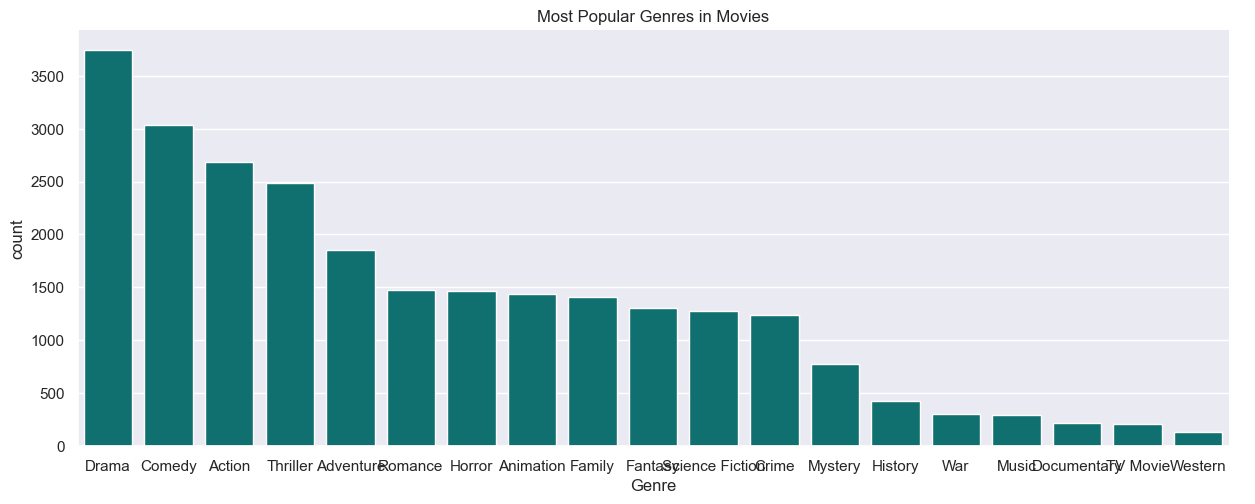

In [1180]:
sns.catplot(x='Genre',data= df,kind='count',order=df['Genre'].value_counts().index, color='teal', aspect=2.5, height=5)
plt.title('Most Popular Genres in Movies')
plt.show()

### **2- Highest Rating**

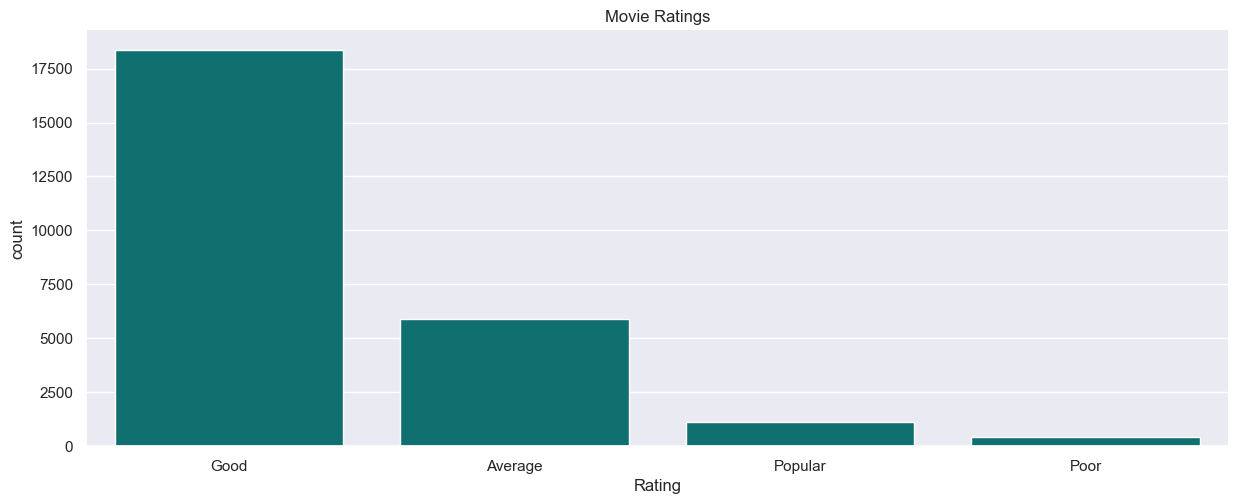

In [1181]:
sns.catplot(x="Rating",data=df,kind="count",order=df['Rating'].value_counts().index, color='teal', aspect=2.5, height=5)
plt.title('Movie Ratings')
plt.show()

### **3- Movies by highest popularity and its Genre**

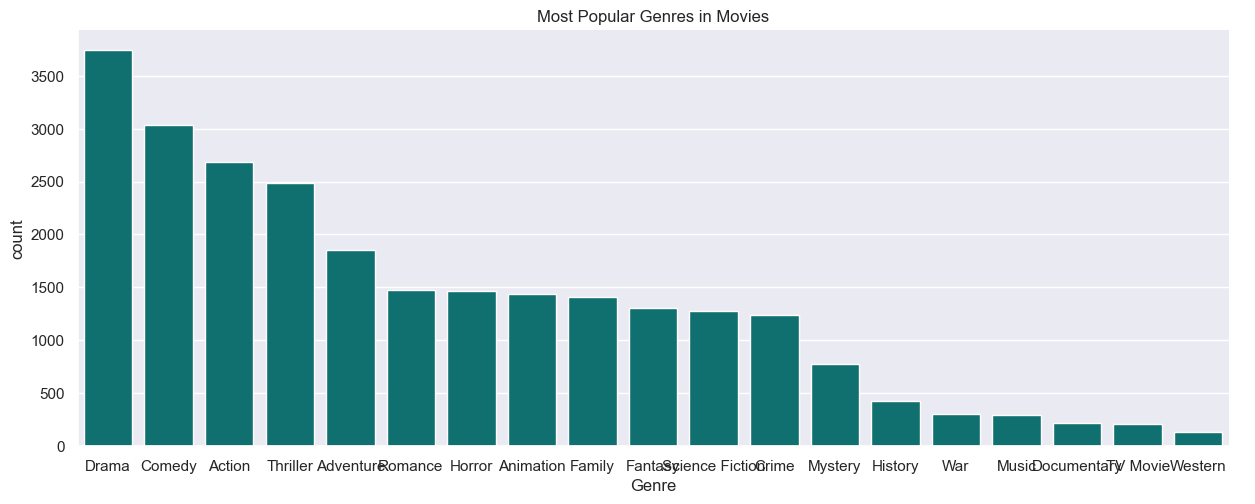

In [1182]:
sns.catplot(x='Genre',data= df,kind='count',order=df['Genre'].value_counts().index, color='teal', aspect=2.5, height=5)
plt.title('Most Popular Genres in Movies')
plt.show()

### **4- Most popular movie and its genre**

In [1183]:
df[df["Popularity"]== df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Genre,Rating
0,2021,Spider-Man: No Way Home,5083.954,8940,Action,Popular
1,2021,Spider-Man: No Way Home,5083.954,8940,Adventure,Popular
2,2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,Popular


### **5- Movie which have the lowest popularity**

In [1184]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Genre,Rating
25786,2021,The United States vs. Billie Holiday,13.354,152,Music,Good
25787,2021,The United States vs. Billie Holiday,13.354,152,Drama,Good
25788,2021,The United States vs. Billie Holiday,13.354,152,History,Good
25789,1984,Threads,13.354,186,War,Good
25790,1984,Threads,13.354,186,Drama,Good
25791,1984,Threads,13.354,186,Science Fiction,Good


### **6- Which year has most filmed movies**

Text(0, 0.5, 'Number of movies')

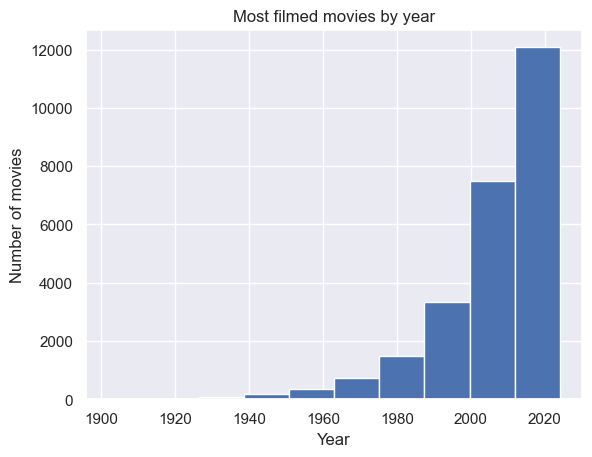

In [1185]:
df['Release_Date'].hist()
plt.title('Most filmed movies by year')     
plt.xlabel('Year')
plt.ylabel('Number of movies')  

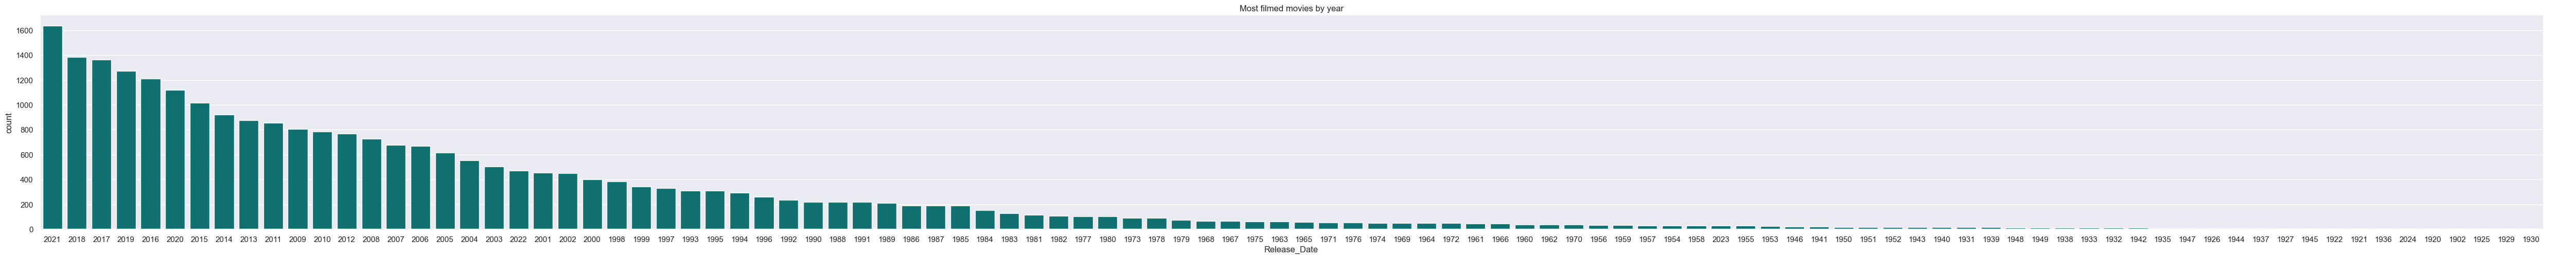

In [1186]:
sns.catplot(x='Release_Date',data= df,kind='count',order=df['Release_Date'].value_counts().index, color='teal', aspect=10, height=5)
plt.title('Most filmed movies by year')
plt.show()

In [1116]:
yearly_counts = df['Release_Date'].value_counts().sort_index()
most_movies_year = yearly_counts.idxmax()
most_movies_count = yearly_counts.max()
print(f"The year with the most movies is {most_movies_year} with {most_movies_count} movies.")


The year with the most movies is 2021 with 1638 movies.
